In [77]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from scipy.ndimage.filters import gaussian_filter

In [78]:
params = {'legend.fontsize': 20,
         'axes.labelsize': 50,
         'axes.titlesize':'x-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'font.weight':'bold',
         'figure.figsize' : (16,12)}
plt.rcParams.update(params)

In [79]:
date='12-21-21'
piece_name='CS573C4'

direc = 'C:/Users/IECs Finest/Desktop/Jupyter/MPPT'


findir=os.chdir(direc+'/'+date+'/'+piece_name)



MPFiles = []

i = 0
for filename in os.listdir(findir):
    if filename.endswith('MPPT.csv'):
        temp = pd.read_csv(filename,sep=',',skiprows=1,names=['MeasNum','Time (hours)','Voltage','Current','Cstd','Efficiency (%)'])
        MPFiles.append(temp)

direc = 'C:/Users/IECs Finest/Desktop/Jupyter/JV'

os.chdir(direc)
#os.chdir(date)
findir=os.chdir(direc+'/'+date+'/'+piece_name)

JVFiles=[]
for filename in os.listdir(findir):
    if filename.endswith('JV.csv'):
        tempjv=pd.read_csv(filename,sep=',',skiprows=1,names=['Measnum','Current Up','Volt Up','Power Up','Currentup Std','Current Down','Volt Down','Power Down','Current Down Std'])
        JVFiles.append(tempjv)
        


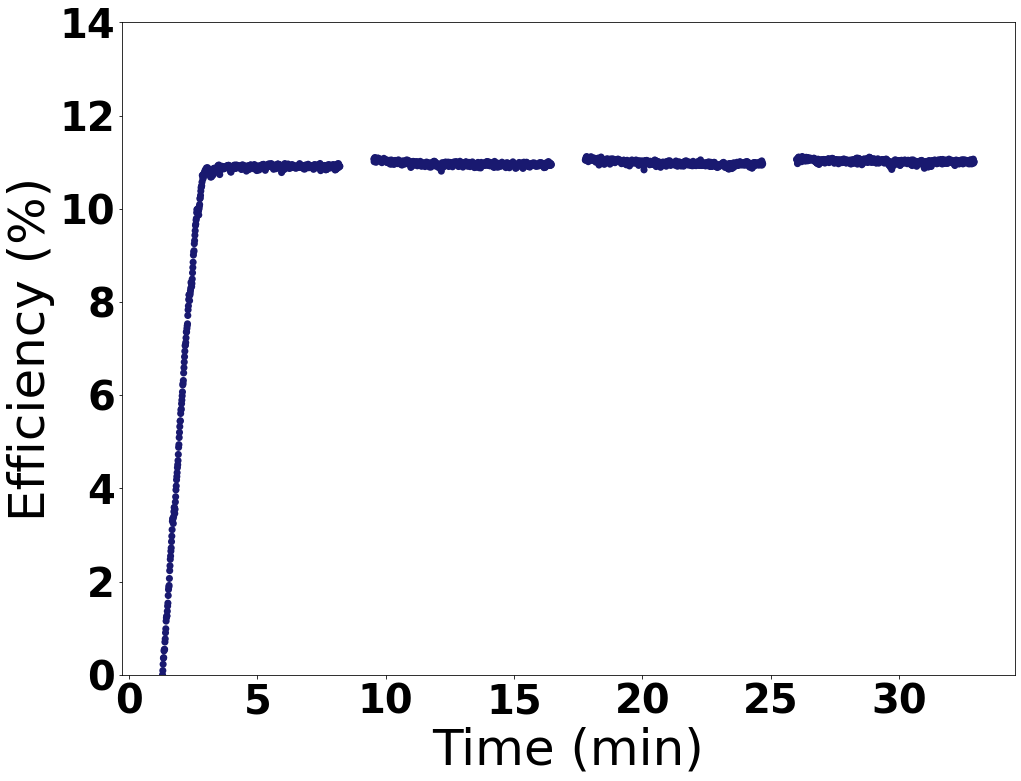

In [83]:
colors=['k','b','r','g','m','c']
for i in range(len(MPFiles)): 

    sns.scatterplot(x=1/60*MPFiles[i]['Time (hours)'],y=MPFiles[i]['Efficiency (%)'],s=50, edgecolor='none',color='midnightblue')

    plt.ylim(0,14)
    plt.xlabel('Time (hours)')
    plt.xlabel('Time (min)')

    plt.ylabel('Efficiency (%)')
plt.savefig('MPPT_fig',bbox_inches='tight',dpi=200)

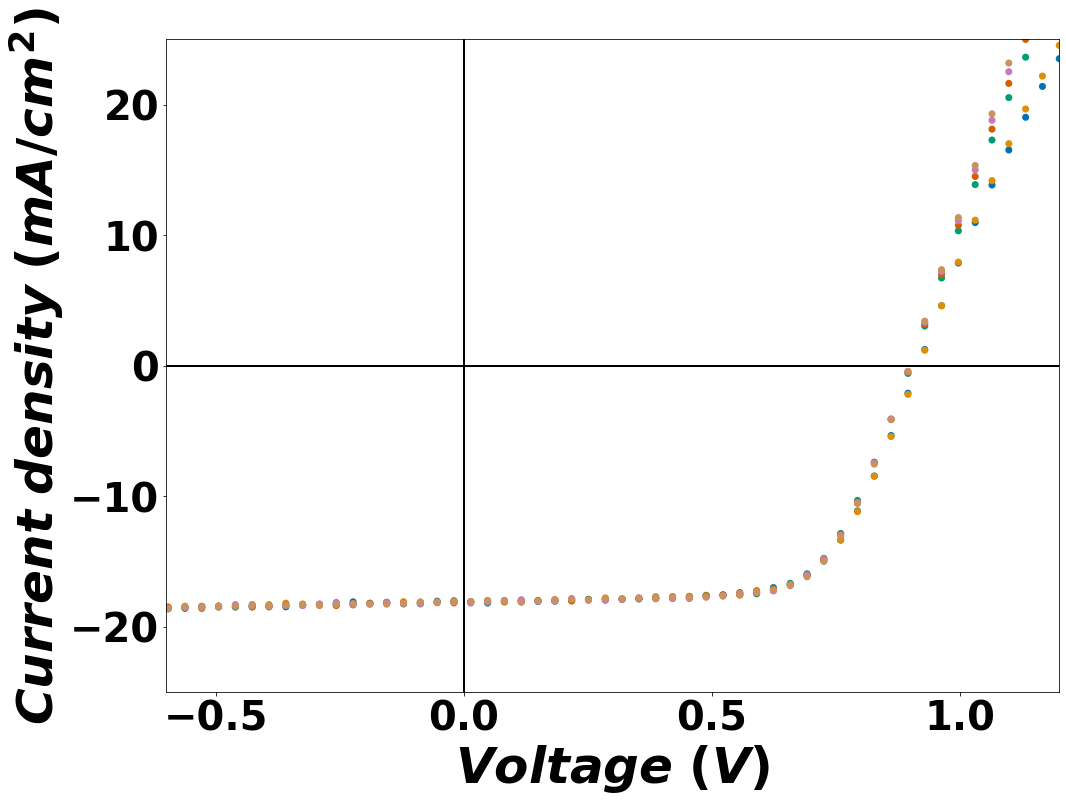

In [86]:
for i in range(len(JVFiles)): 
    sns.set_palette(palette='colorblind')

    sns.scatterplot(x=JVFiles[i]['Volt Down'],y=1000*JVFiles[i]['Current Down'],s=50,edgecolor='none')

    plt.plot([-100,100],[0,0],color='k')
    plt.plot([0,0],[-25,25],color='k')
    plt.xlim(-.6,1.2)
    plt.ylim(-25,25)
    plt.xlabel('$Voltage$ $(V)$')
    plt.ylabel('$Current$ $density$ $(mA/cm^2)$')

plt.savefig('JV_fig',bbox_inches='tight',dpi=200)

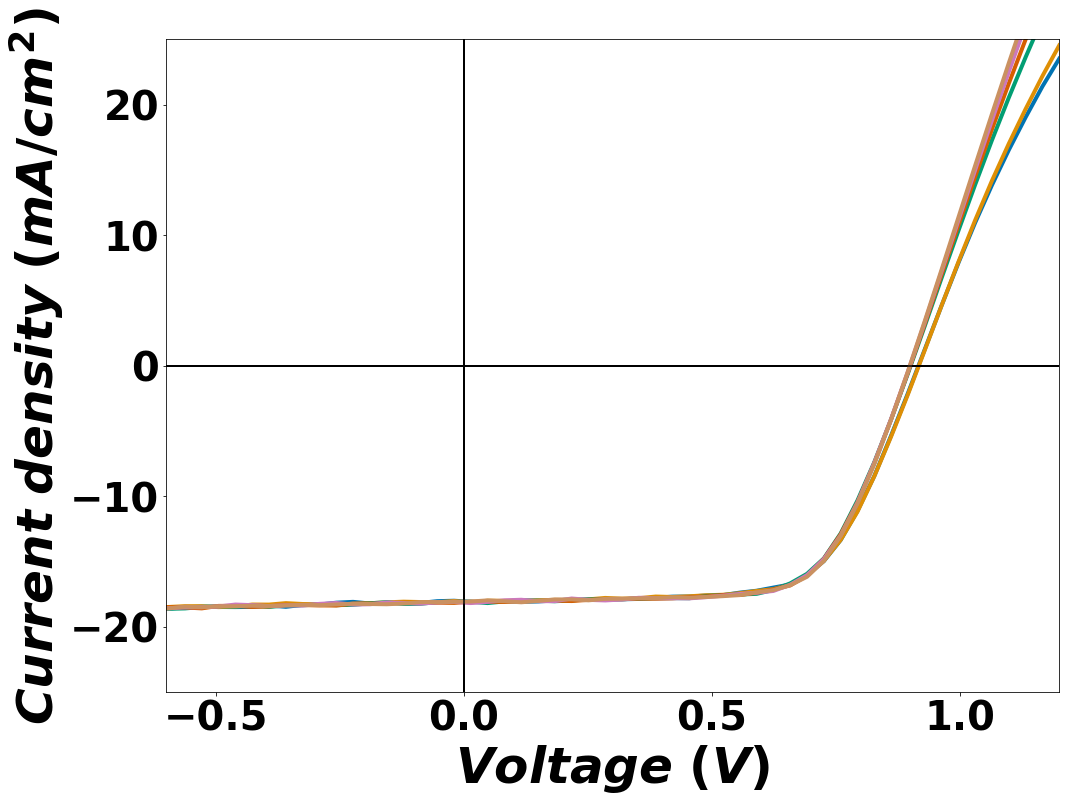

In [88]:
for i in range(len(JVFiles)): 
    sns.set_palette(palette='colorblind')

    sns.lineplot(x=JVFiles[i]['Volt Down'],y=1000*JVFiles[i]['Current Down'],linewidth=4)

    plt.plot([-100,100],[0,0],color='k')
    plt.plot([0,0],[-25,25],color='k')
    plt.xlim(-.6,1.2)
    plt.ylim(-25,25)
    plt.xlabel('$Voltage$ $(V)$')
    plt.ylabel('$Current$ $density$ $(mA/cm^2)$')

plt.savefig('JV_fig',bbox_inches='tight',dpi=200)